# NOAA GOES 16 Satellite Data

last run: Nov 16, 2019

In [1]:
import tempfile

import boto3
import dask
import matplotlib.pyplot as plt
import netCDF4
import xarray as xr

S3_BUCKET = "noaa-goes17"  # open-source from NOAA
s3 = boto3.client("s3")

## Downloading

One can access NOAA's publicly-accessible data set at their [s3 bucket](https://s3.console.aws.amazon.com/s3/buckets/noaa-goes16/?region=us-west-2&tab=overview). Specifically, we are interested in data from the `ABI-L1b-RadM` sensor, which is organized into `<year>/<day of year>/<hour of day>/<file>.nc`. As the file extension suggests, these files are in NetCDF format. 

A typical path is: `ABI-L1b-RadM/2019/300/20/OR_ABI-L1b-RadM1-M6C14_G17_s20193002048275_e20193002048332_c20193002048405.nc`:

- noaa-goes17 (bucket name)
- ABI-L1b-RadM (sensor on the satellite)
- 2019 (year)
- 300 (day of year)
- 20 (hour of day)
- OR (real-time data)
- ABI (sensor type)
- L1b (processing level -- L1b or L2)
- Rad (radians)
- M1 (mesoscale region 1)
- M6 (mode 6)
- C14 (channel 14 -- 01 through 16)
- G17 (GOES-17 satellite)
- s20193002048275 (scan start time)
- e20193002048332 (scan end time)
- c20193002048405 (file creation time)
- .nc (nedCDF file extension)


For more information, refer to https://docs.opendata.aws/noaa-goes16/cics-readme.html. 

In [2]:
def plot(s3_key, ax):
    with tempfile.NamedTemporaryFile() as file_path:
        s3.download_file(Bucket=S3_BUCKET, Key=s3_key, Filename=file_path.name)
        ds = xr.open_dataset(file_path.name)
    ax.imshow(ds.Rad);

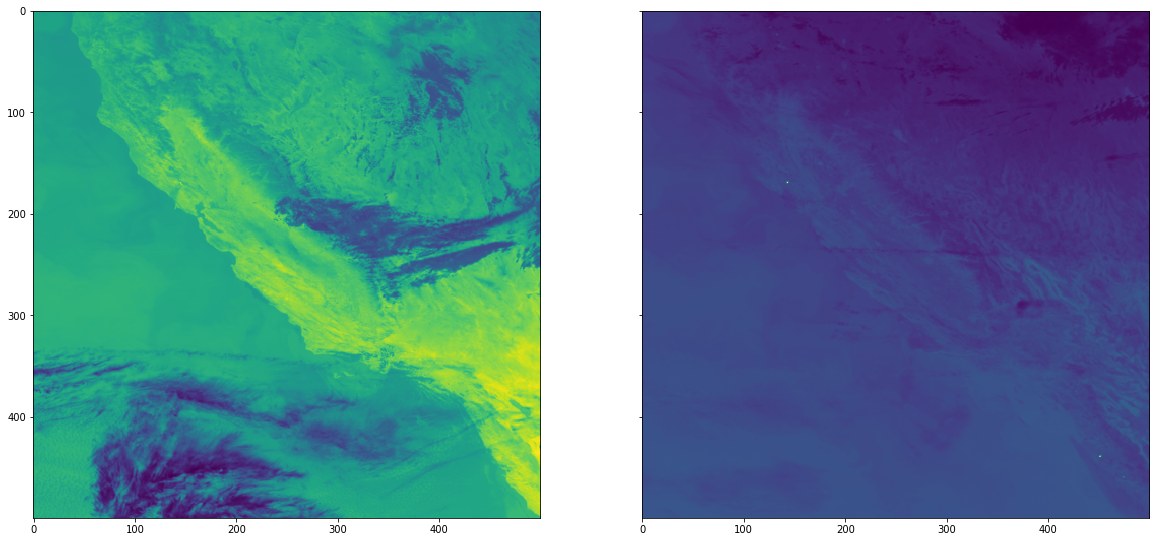

In [3]:
fig, axes = plt.subplots(ncols=2, figsize=(20, 14), sharey=True)
plot("ABI-L1b-RadM/2019/300/20/OR_ABI-L1b-RadM1-M6C14_G17_s20193002048275_e20193002048332_c20193002048405.nc", ax=axes[0])
plot("ABI-L1b-RadM/2019/300/03/OR_ABI-L1b-RadM1-M6C07_G17_s20193000302275_e20193000302344_c20193000302395.nc", ax=axes[1])

In [ ]:
# dask_client = dask.distributed.Client(n_workers=2, threads_per_worker=2, memory_limit="1GB")

# with tempfile.NamedTemporaryFile() as file_path:
#     s3.download_file(Bucket=S3_BUCKET, Key=TEST_KEY, Filename=file_path.name)
#     ds = xr.open_dataset(file_path.name, chunks={"x": 1000, "y": 1000})